In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy import sin, pi
from scipy.signal import find_peaks_cwt
from ampd import find_peaks_ampd, find_peaks_ampd_original, find_peaks_ass_ampd
import matplotlib.pyplot as plt

## Create fake signal

In [3]:
def fake_timeseries(tmax=30, seed=None):
    """Generate fake data for testing peak detection algorithms"""
    np.random.seed(seed)
    fs, f1, f2, f3, a, b, c, d = 20, 1, 2, 0.1, 1, 0.6, 1, 1.
    N = int(tmax*fs)
    t = np.linspace(0, tmax, N)
    x = a*sin(2*pi*f1*t) + b*sin(2*pi*f2*t) + c*sin(2*pi*f3*t) + d*np.random.rand(N)
    return t, x

## Compare peak detect methods

In [4]:
methods = [
    ('original_ampd', find_peaks_ampd_original),
    ('ampd', find_peaks_ampd),
    ('ampd_fast', lambda x: find_peaks_ampd(x, scale=50)),
    ('ass_ampd', find_peaks_ass_ampd),
    ('cwt', lambda x: find_peaks_cwt(x, widths=range(1,50))),
]
styles = ['rs', 'go', 'bx', 'cs', 'mo']

In [5]:
t, x = fake_timeseries(tmax=30, seed=0)

In [6]:
all_pks = [method(x) for name, method in methods]

Text(0,0.5,'signal')

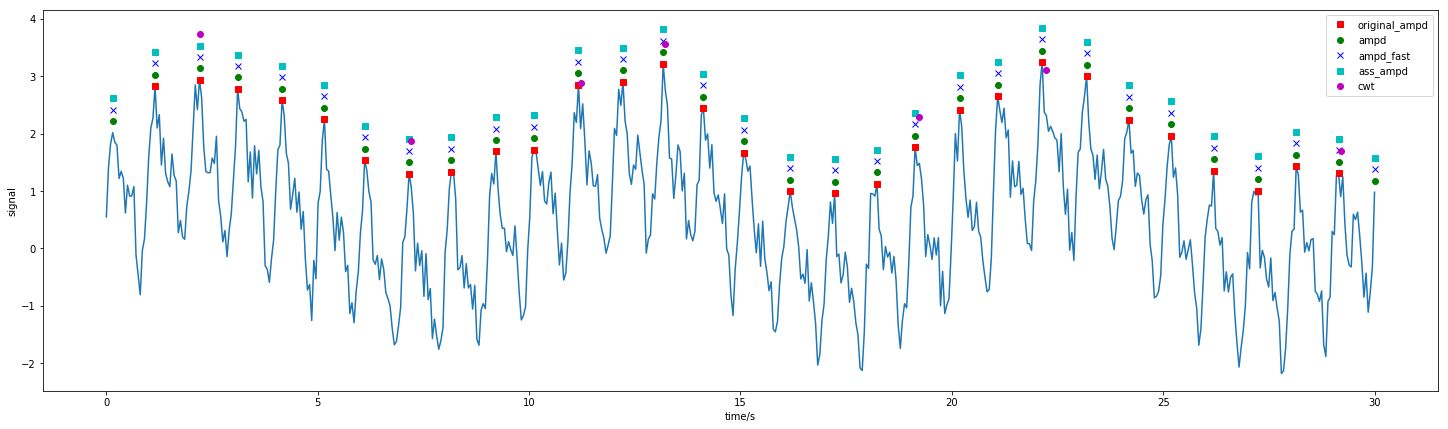

In [7]:
plt.figure(figsize=(25, 7))
plt.plot(t, x, '-')
for idx in range(len(methods)):
    pks = all_pks[idx]
    offset = idx * 0.2
    style = styles[idx]
    name = methods[idx][0]
    plt.plot(t[pks], offset + x[pks], style, label=name)
plt.legend()
plt.xlabel('time/s')
plt.ylabel('signal')

## Compare timing

In [8]:
t, x = fake_timeseries(tmax=30, seed=0)
print('{} samples over {} min'.format(len(x), t[-1]/60))

600 samples over 0.5 min


In [9]:
for name, method in methods:
    print('timing "{}":'.format(name.upper()))
    %time pks = method(x)
    print()

timing "ORIGINAL_AMPD":
CPU times: user 8.47 ms, sys: 1.06 ms, total: 9.53 ms
Wall time: 2.76 ms

timing "AMPD":
CPU times: user 15.7 ms, sys: 811 µs, total: 16.5 ms
Wall time: 4.18 ms

timing "AMPD_FAST":
CPU times: user 5.67 ms, sys: 616 µs, total: 6.28 ms
Wall time: 1.58 ms

timing "ASS_AMPD":
CPU times: user 841 ms, sys: 26.4 ms, total: 867 ms
Wall time: 308 ms

timing "CWT":
CPU times: user 29.3 ms, sys: 583 µs, total: 29.9 ms
Wall time: 29.9 ms



## Inspect LSM

In [10]:
t, x = fake_timeseries(tmax=30, seed=0)

In [11]:
pks, LSM, G, l = find_peaks_ampd(x, debug=True)

Text(0,0.5,'signal')

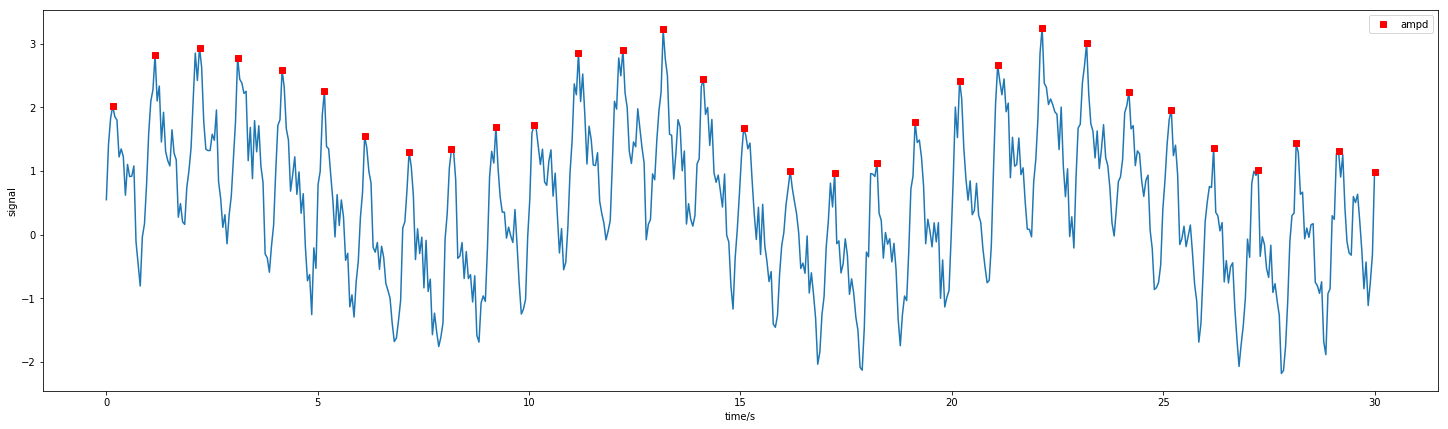

In [12]:
plt.figure(figsize=(25, 7))
plt.plot(t, x, '-')
plt.plot(t[pks], x[pks], 'rs', label='ampd')
plt.legend()
plt.xlabel('time/s')
plt.ylabel('signal')

Text(0.5,0,'# local peaks')

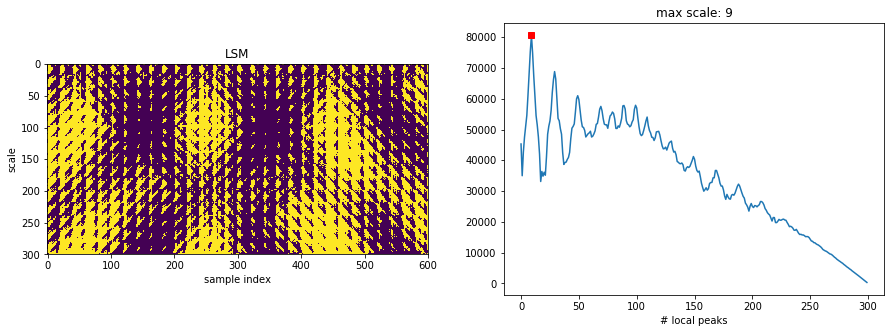

In [13]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 5))
ax = ax0
ax.imshow(LSM)
ax.set_title('LSM')
ax.set_xlabel('sample index')
ax.set_ylabel('scale')
ax = ax1
ax.plot(G)
ax.plot([l], G[l], 'rs')
ax.set_title('max scale: {}'.format(l))
ax.set_xlabel('scale')
ax.set_xlabel('# local peaks')